# Ozone Concentration Analysis - California Air Quality Analysis

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

## Executive Summary


The purpose of this report was to explores ozone pollution trends across California, using daily 8-hour maximum ozone concentration data from the U.S. EPA. The focus is to uncover high-risk regions, temporal trends, urban effects, and support data-driven environmental policy decisions.A geospatial heatmap was used to reveals pollution hotspots with clear regional clustering.

Key findings include:
- Ozone levels spike in warmer inland regions like Fresno and San Bernardino.
- Urban areas show signs of lower ozone levels on weekends.
- Seasonal and spatial differences suggest where interventions should be focused.
- Seasonal spikes in ozone during warmer months (May–October).
- Weekdays exhibit higher ozone levels than weekends, especially in urban zones.

Through robust data cleaning, exploratory data analysis, and geospatial modeling, the report builds a cohesive story linking ozone concentration patterns to human activity, geography, and time, culminating in clear policy and research recommendations.

## Data Cleaning & Exploratory Data Analysis (EDA)

The ozone dataset contained over 49,000 daily ozone readings across California. Before analysis was done, several data quality issues were addressed:

- Missing Values: Rows with missing values were dropped or replaced with the mean depending       on the column.

- Duplicates: Over 3,600 duplicate rows were identified and removed.

- Data Types: Dates were parsed into datetime objects for time-based analysis.

- Outliers: Ozone values outside the IQR range (below 0.007 ppm or above 0.079 ppm) were flagged. A total of 1,126 potential outlier readings were detected.

- Day Type Classification: A new column was created to differentiate between weekdays and weekends based on observation date.

This step was crucial for reliable and consistent dataset for trend analysis and visualization.


**Step 1: load and inspect data**

In [93]:
import pandas as pd
ozone = pd.read_csv('data/ozone.csv')
ozone.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [94]:
ozone.info() # this shows columns names and data types
ozone.shape #this shows the number of rows and columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

(54759, 17)

In [95]:
ozone.isna().sum() #this shows nunber of null values in each column

Date                                       0
Source                                     0
Site ID                                    0
POC                                        0
Daily Max 8-hour Ozone Concentration    2738
Units                                      0
Daily AQI Value                         2738
Local Site Name                            0
Daily Obs Count                            0
Percent Complete                           0
Method Code                             6490
CBSA Code                               2408
CBSA Name                               2408
County FIPS Code                           0
County                                     0
Site Latitude                              0
Site Longitude                             0
dtype: int64

In [96]:
ozone.describe() #gives a quick statistical summary

,Site ID,POC,Daily Max 8-hour Ozone Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,Method Code,CBSA Code,County FIPS Code,Site Latitude,Site Longitude
count,5.475900e+04,54759.000000,52021.000000,52021.000000,54759.000000,54759.000000,48269.000000,52351.000000,54759.000000,54759.000000,54759.000000
mean,6.059086e+07,1.000256,0.043519,45.280079,27.534688,99.340346,89.051669,36107.577697,58.918406,36.169550,-119.665107
std,3.001943e+05,0.015988,0.014610,25.899065,97.800446,3.658452,36.636778,9536.717562,30.012874,2.192841,2.022987
min,6.001001e+07,1.000000,0.000000,0.000000,1.000000,6.000000,47.000000,12540.000000,1.000000,32.578165,-124.179490
25%,6.031100e+07,1.000000,0.034000,31.000000,17.000000,100.000000,87.000000,31080.000000,31.000000,34.181977,-121.420838
50%,6.065500e+07,1.000000,0.041000,38.000000,17.000000,100.000000,87.000000,40140.000000,65.000000,36.209286,-119.828400
75%,6.081100e+07,1.000000,0.052000,48.000000,17.000000,100.000000,87.000000,41860.000000,81.000000,37.961578,-118.068500
max,6.113100e+07,2.000000,0.139000,236.000000,1000.000000,100.000000,199.000000,49700.000000,113.000000,41.726892,-114.602090


**Step 2: Data cleaning**


**Handling missing values**

In [97]:

# Handling missing values
# Drop rows where 'Daily Max 8-hour Ozone Concentration' or 'Daily AQI Value' are missing
ozone = ozone.dropna(subset=['Daily Max 8-hour Ozone Concentration', 'Daily AQI Value'])

# Fill missing values in 'Percent Complete' with the mean of the column
ozone['Percent Complete'] = ozone['Percent Complete'].fillna(ozone['Percent Complete'].mean())

# Convert 'Date' column to datetime
ozone['Date'] = pd.to_datetime(ozone['Date'], errors='coerce')

# Normalize 'Site ID' and 'County FIPS Code' to string for consistency
ozone['Site ID'] = ozone['Site ID'].astype(str)
ozone['County FIPS Code'] = ozone['County FIPS Code'].astype(str)

# Normalize 'Site Latitude' and 'Site Longitude' to a consistent number of decimal places
ozone['Site Latitude'] = ozone['Site Latitude'].round(6)
ozone['Site Longitude'] = ozone['Site Longitude'].round(6)

# Drop any rows where 'Date' conversion resulted in NaT
ozone = ozone.dropna(subset=['Date'])

# Handle missing values for 'Method Code', 'CBSA Code', and 'CBSA Name'
ozone['Method Code'] = ozone['Method Code'].fillna(ozone['Method Code'].mode()[0])
ozone['CBSA Code'] = ozone['CBSA Code'].fillna(ozone['CBSA Code'].mode()[0])
ozone['CBSA Name'] = ozone['CBSA Name'].fillna(ozone['CBSA Name'].mode()[0])

# Reset index after cleaning
ozone.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
ozone.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-06,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


**Dropping duplicate entries**

In [98]:
# Check for duplicate entries in the 'ozone' dataframe
duplicate_entries = ozone[ozone.duplicated()]

# Display duplicate entries if any
duplicate_entries

# Drop duplicate entries from the 'ozone' dataframe
ozone = ozone.drop_duplicates()

# Reset index after dropping duplicates
ozone.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
ozone.head()



,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-06,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [99]:
# Create a new column to distinguish weekdays from weekends
ozone['day_type'] = ozone['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


**Sorting out outliers**

In [100]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = ozone['Daily Max 8-hour Ozone Concentration'].quantile(0.25)
Q3 = ozone['Daily Max 8-hour Ozone Concentration'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier thresholds:\nLower: {lower_bound:.3f} ppm\nUpper: {upper_bound:.3f} ppm")

# Step 3: Filter outliers
outliers = ozone[
    (ozone['Daily Max 8-hour Ozone Concentration'] < lower_bound) |
    (ozone['Daily Max 8-hour Ozone Concentration'] > upper_bound)
]
print(f"\nNumber of outlier rows: {len(outliers)}")

# Optional: Display extreme values
outliers[['Date', 'Daily Max 8-hour Ozone Concentration', 'County', 'Local Site Name']].sort_values(by='Daily Max 8-hour Ozone Concentration', ascending=False).head()


Outlier thresholds:
Lower: 0.007 ppm
Upper: 0.079 ppm

Number of outlier rows: 1126


,Date,Daily Max 8-hour Ozone Concentration,County,Local Site Name
7483,2024-01-01,0.139,Imperial,El Centro-9th Street
28185,2024-07-05,0.131,San Bernardino,Redlands
28189,2024-07-11,0.127,San Bernardino,Redlands
26668,2024-07-12,0.121,San Bernardino,Crestline
28786,2024-01-01,0.121,San Bernardino,San Bernardino


In [101]:
# Define the thresholds
lower = 0.007
upper = 0.079

# Recompute IQR thresholds without rounding
Q1 = ozone['Daily Max 8-hour Ozone Concentration'].quantile(0.25)
Q3 = ozone['Daily Max 8-hour Ozone Concentration'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Use the thresholds to flag
ozone['is_outlier'] = ozone['Daily Max 8-hour Ozone Concentration'].apply(
    lambda x: x < lower or x > upper
)

# Now confirm:
print("Outliers by IQR filter:", ((ozone['Daily Max 8-hour Ozone Concentration'] < lower) | 
                                   (ozone['Daily Max 8-hour Ozone Concentration'] > upper)).sum())

print("Outliers using is_outlier flag:", ozone['is_outlier'].sum())


Outliers by IQR filter: 1126
Outliers using is_outlier flag: 1126


In [102]:
# Check how many are True/False
ozone['is_outlier'].value_counts()


is_outlier
False    44605
True      1126
Name: count, dtype: int64

In [103]:
ozone[ozone['is_outlier']].head()


,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,day_type,is_outlier
794,2024-12-06,AirNow,60010013,1,0.007,ppm,6.0,Berkeley- Aquatic Park,24,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.864767,-122.302741,Weekday,True
806,2024-12-22,AirNow,60010013,1,0.006,ppm,6.0,Berkeley- Aquatic Park,24,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.864767,-122.302741,Weekend,True
1325,2024-07-03,AQS,60050002,1,0.083,ppm,143.0,Jackson-Clinton Road,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",5,Amador,38.342606,-120.764426,Weekday,True
1334,2024-01-01,AQS,60050002,1,0.080,ppm,133.0,Jackson-Clinton Road,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",5,Amador,38.342606,-120.764426,Weekday,True
2839,2024-12-16,AirNow,60130002,1,0.007,ppm,6.0,Concord,24,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",13,Contra Costa,37.936013,-122.026154,Weekday,True


## How Ozone Levels Vary Over Time & Region

Ozone concentrations exhibit both seasonal and regional variation:

**Temporal Trend:** Ozone levels were higher during summer months (especially July), reflecting stronger sunlight and higher temperatures that catalyze ozone formation.


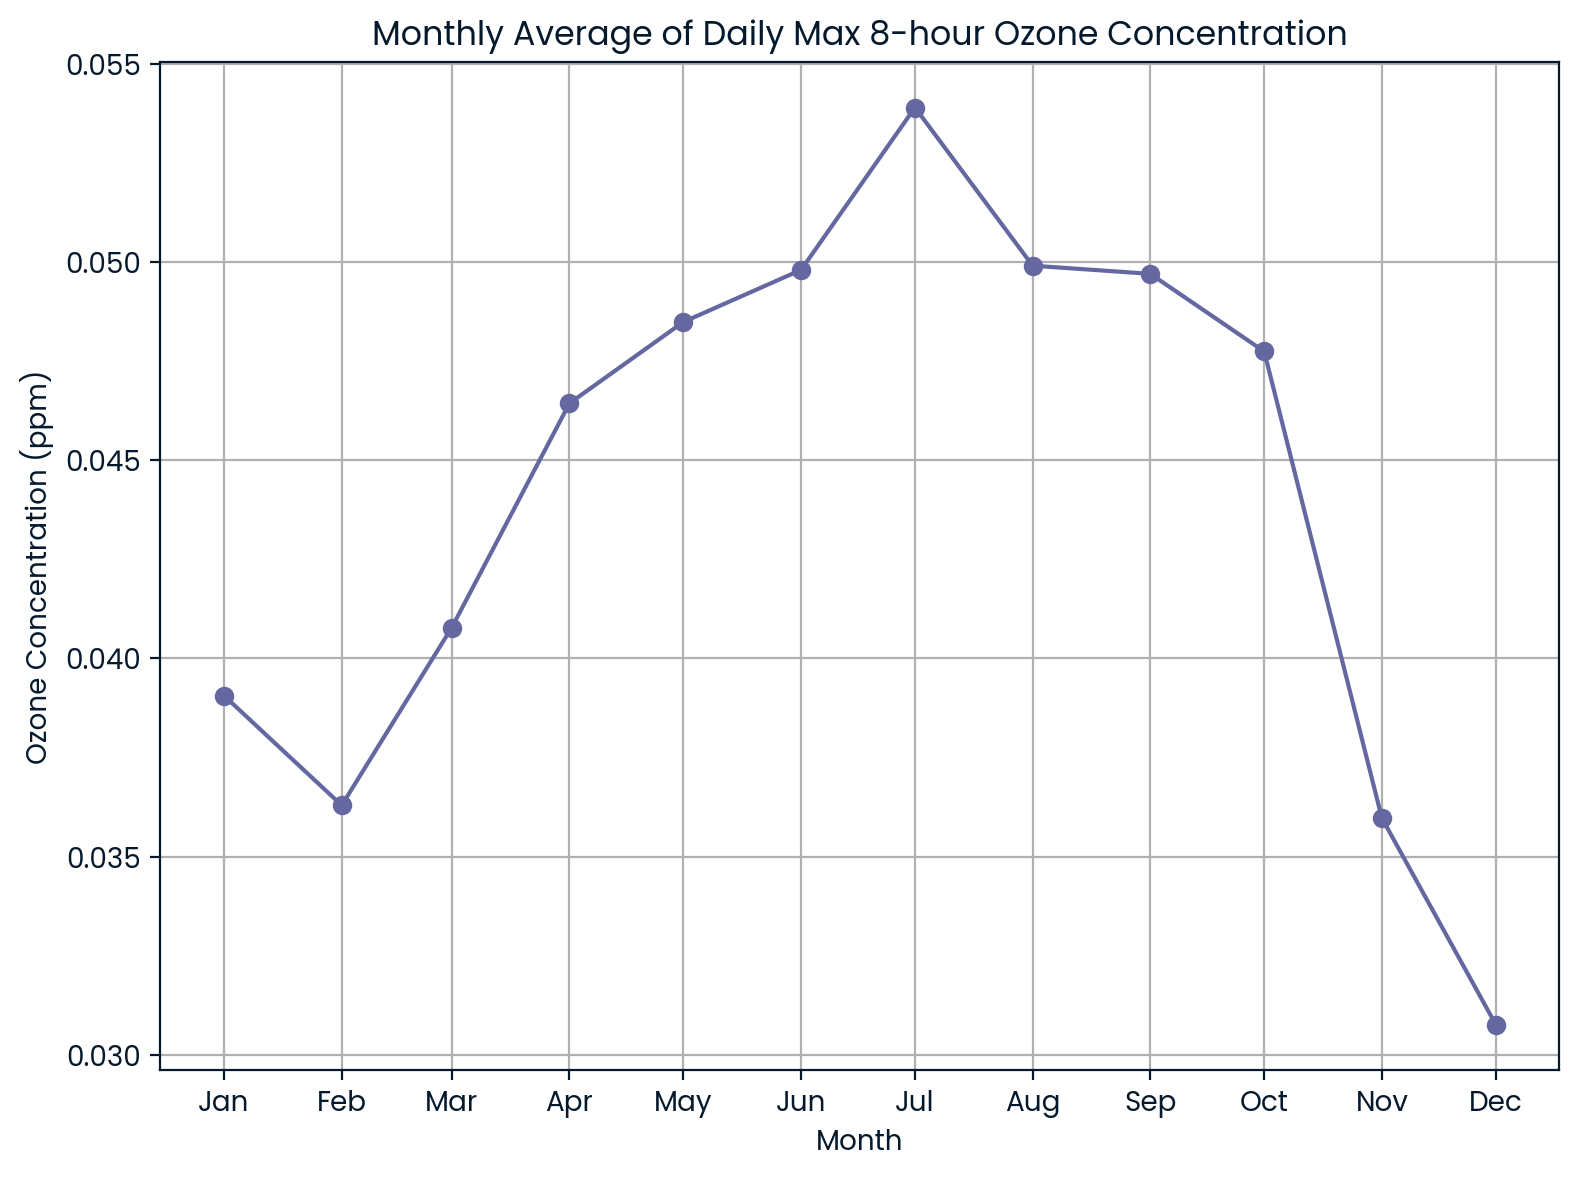

In [104]:
import matplotlib.pyplot as plt

# Group by month and calculate mean
monthly_avg = ozone.groupby(ozone['Date'].dt.to_period("M"))['Daily Max 8-hour Ozone Concentration'].mean()

# Convert PeriodIndex to datetime to format labels
monthly_avg.index = monthly_avg.index.to_timestamp()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')

# Format x-axis with short month names only
plt.xticks(monthly_avg.index, monthly_avg.index.strftime('%b'))  # %b gives 'Jan', 'Feb', etc.

plt.xlabel('Month')
plt.ylabel('Ozone Concentration (ppm)')
plt.title('Monthly Average of Daily Max 8-hour Ozone Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()


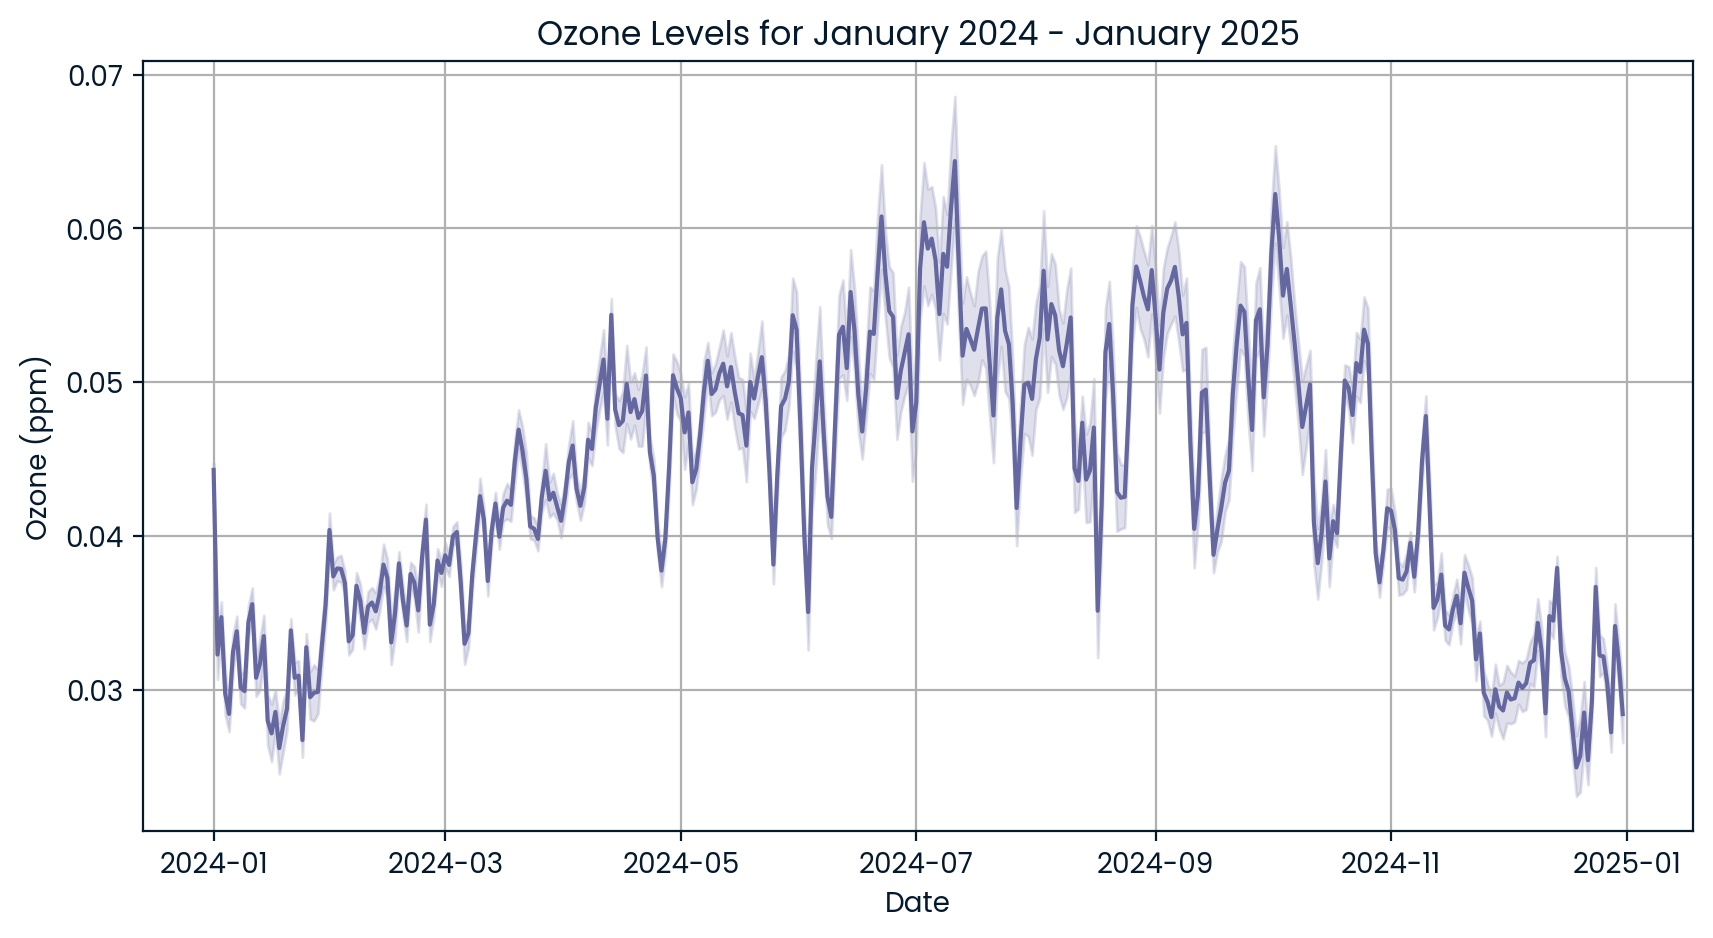

In [105]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=ozone, x='Date', y='Daily Max 8-hour Ozone Concentration')
plt.title("Ozone Levels for January 2024 - January 2025")
plt.ylabel("Ozone (ppm)")
plt.grid(True)
plt.show()

**Regional Variation** 

Areas like San Bernardino, Kern, Tulare and Los Angeles counties, showed consistently higher ozone levels compared to regions like Alameda, Humboldt and San Francisco.


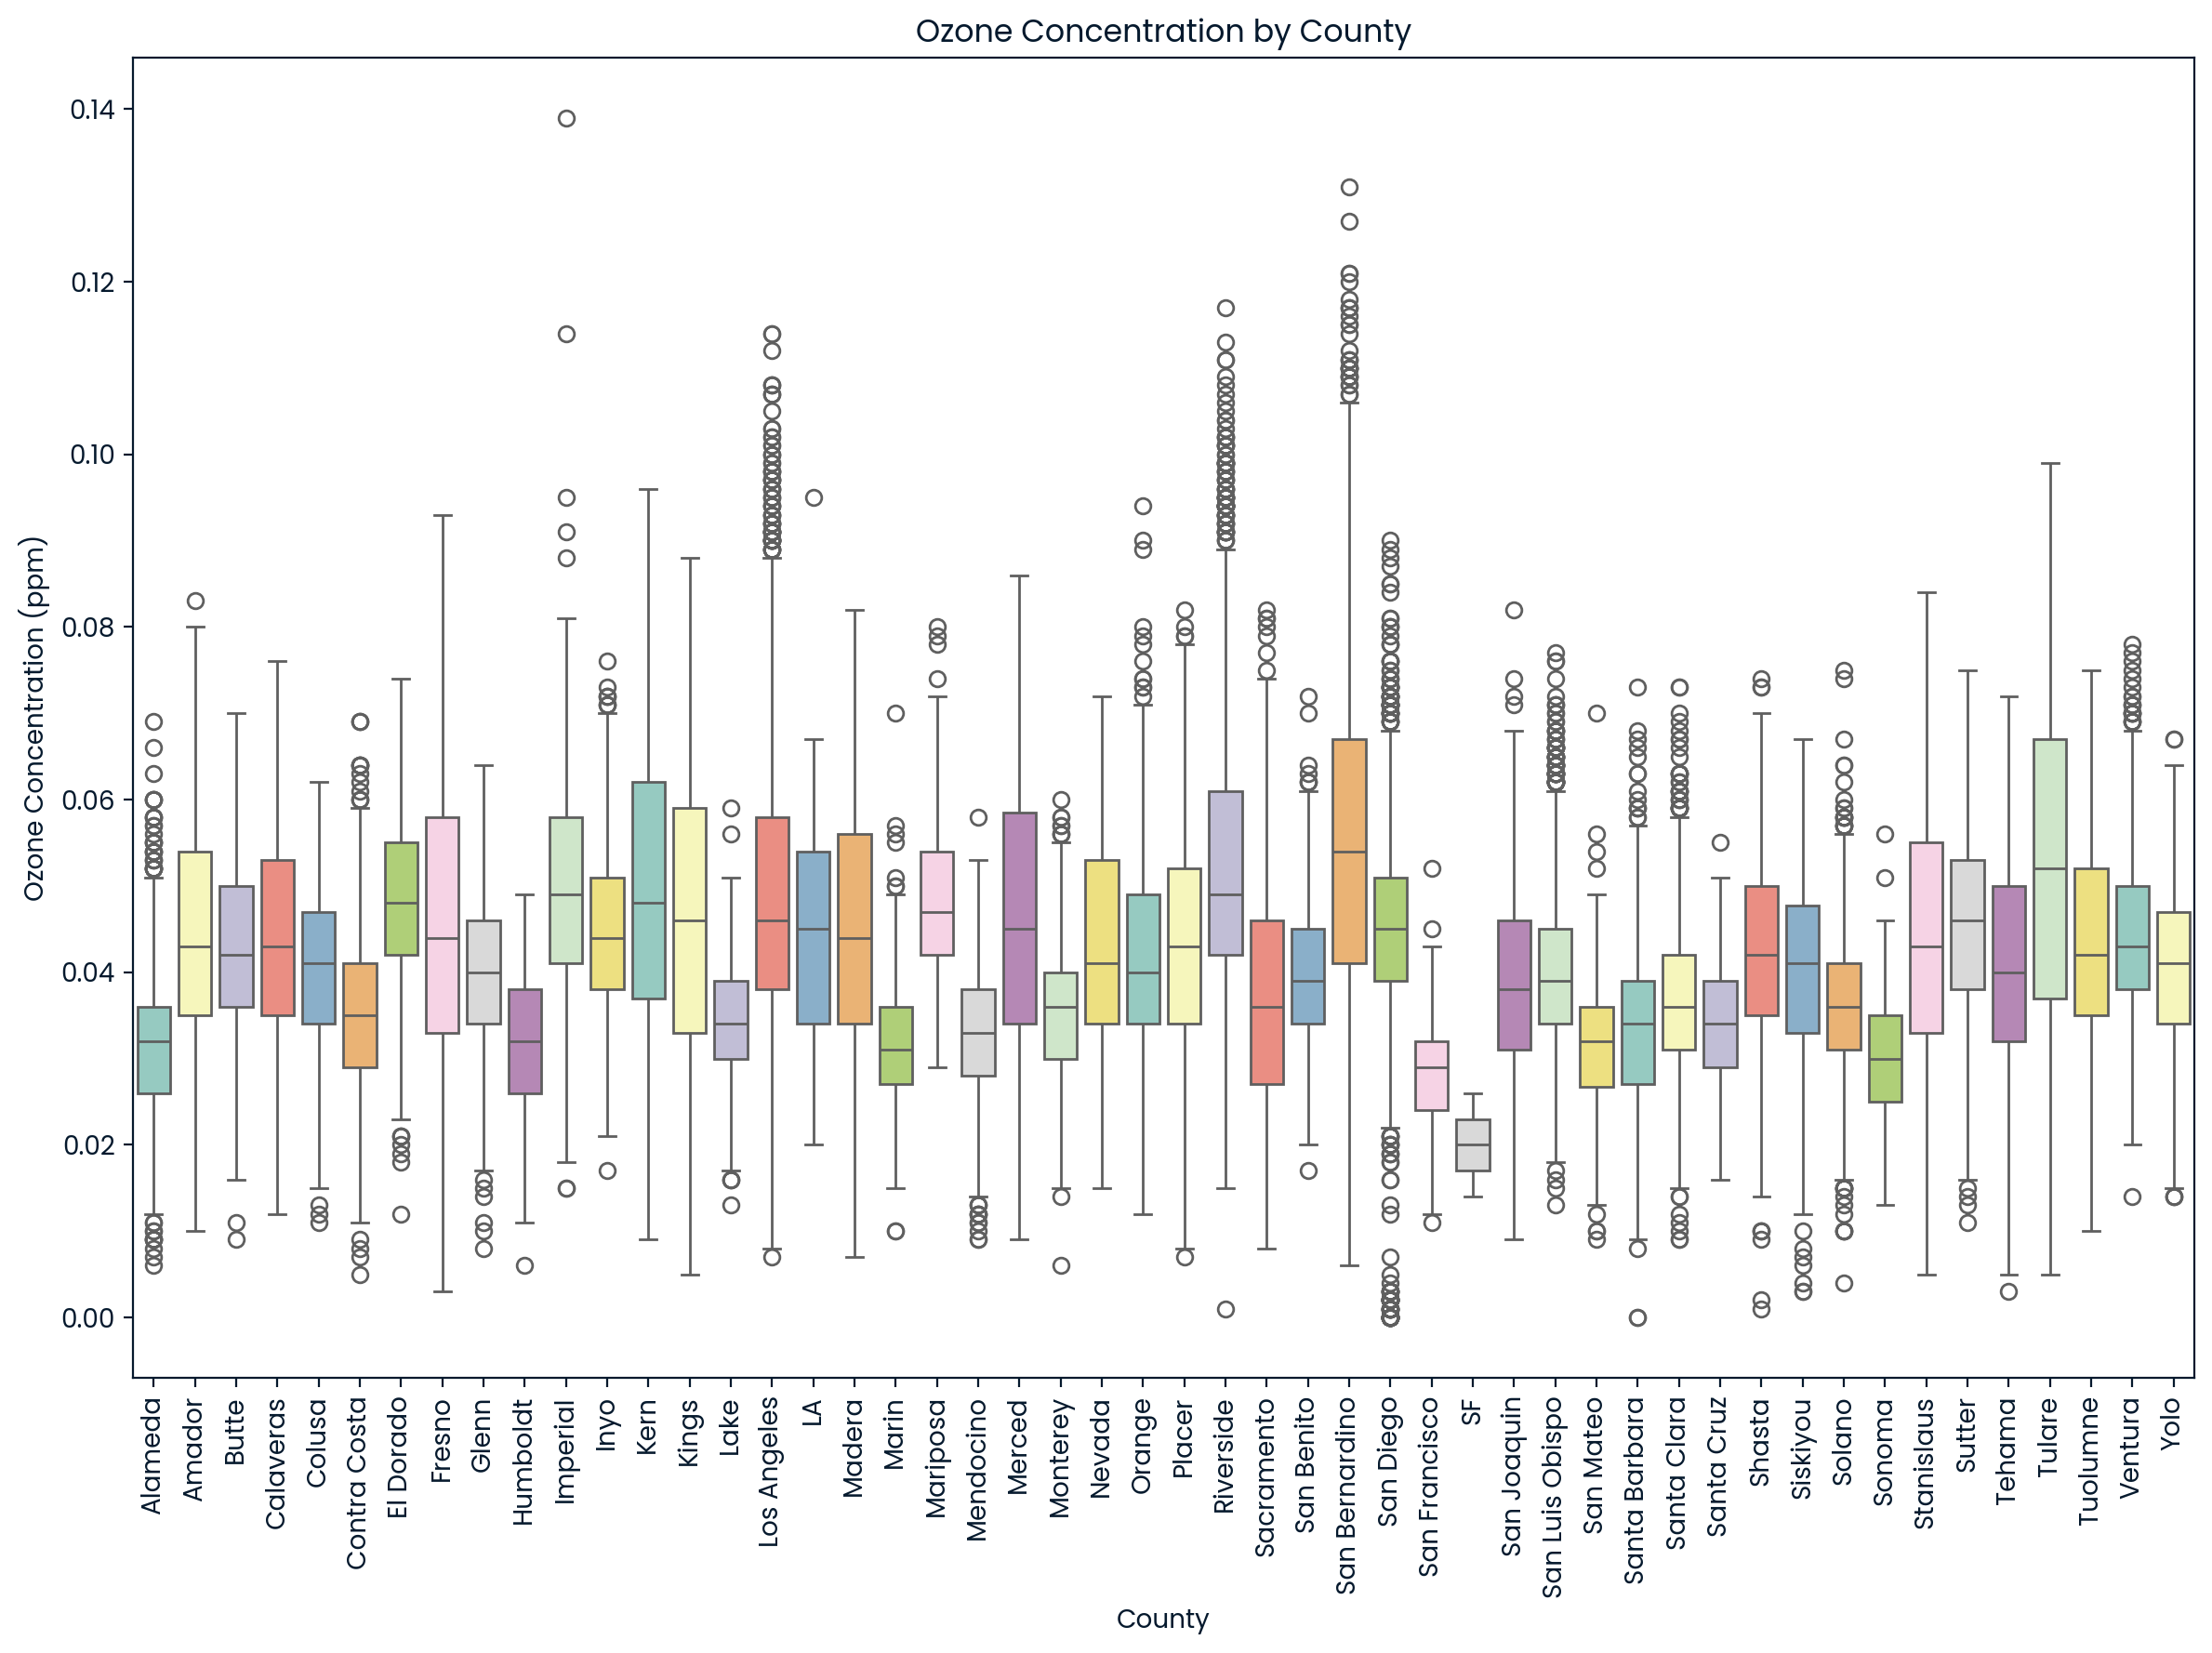

In [106]:
plt.figure(figsize=(12, 9))
sns.boxplot(
    data=ozone,
    x='County',
    y='Daily Max 8-hour Ozone Concentration',
    palette='Set3'
)
plt.title("Ozone Concentration by County")
plt.xlabel("County")
plt.ylabel("Ozone Concentration (ppm)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


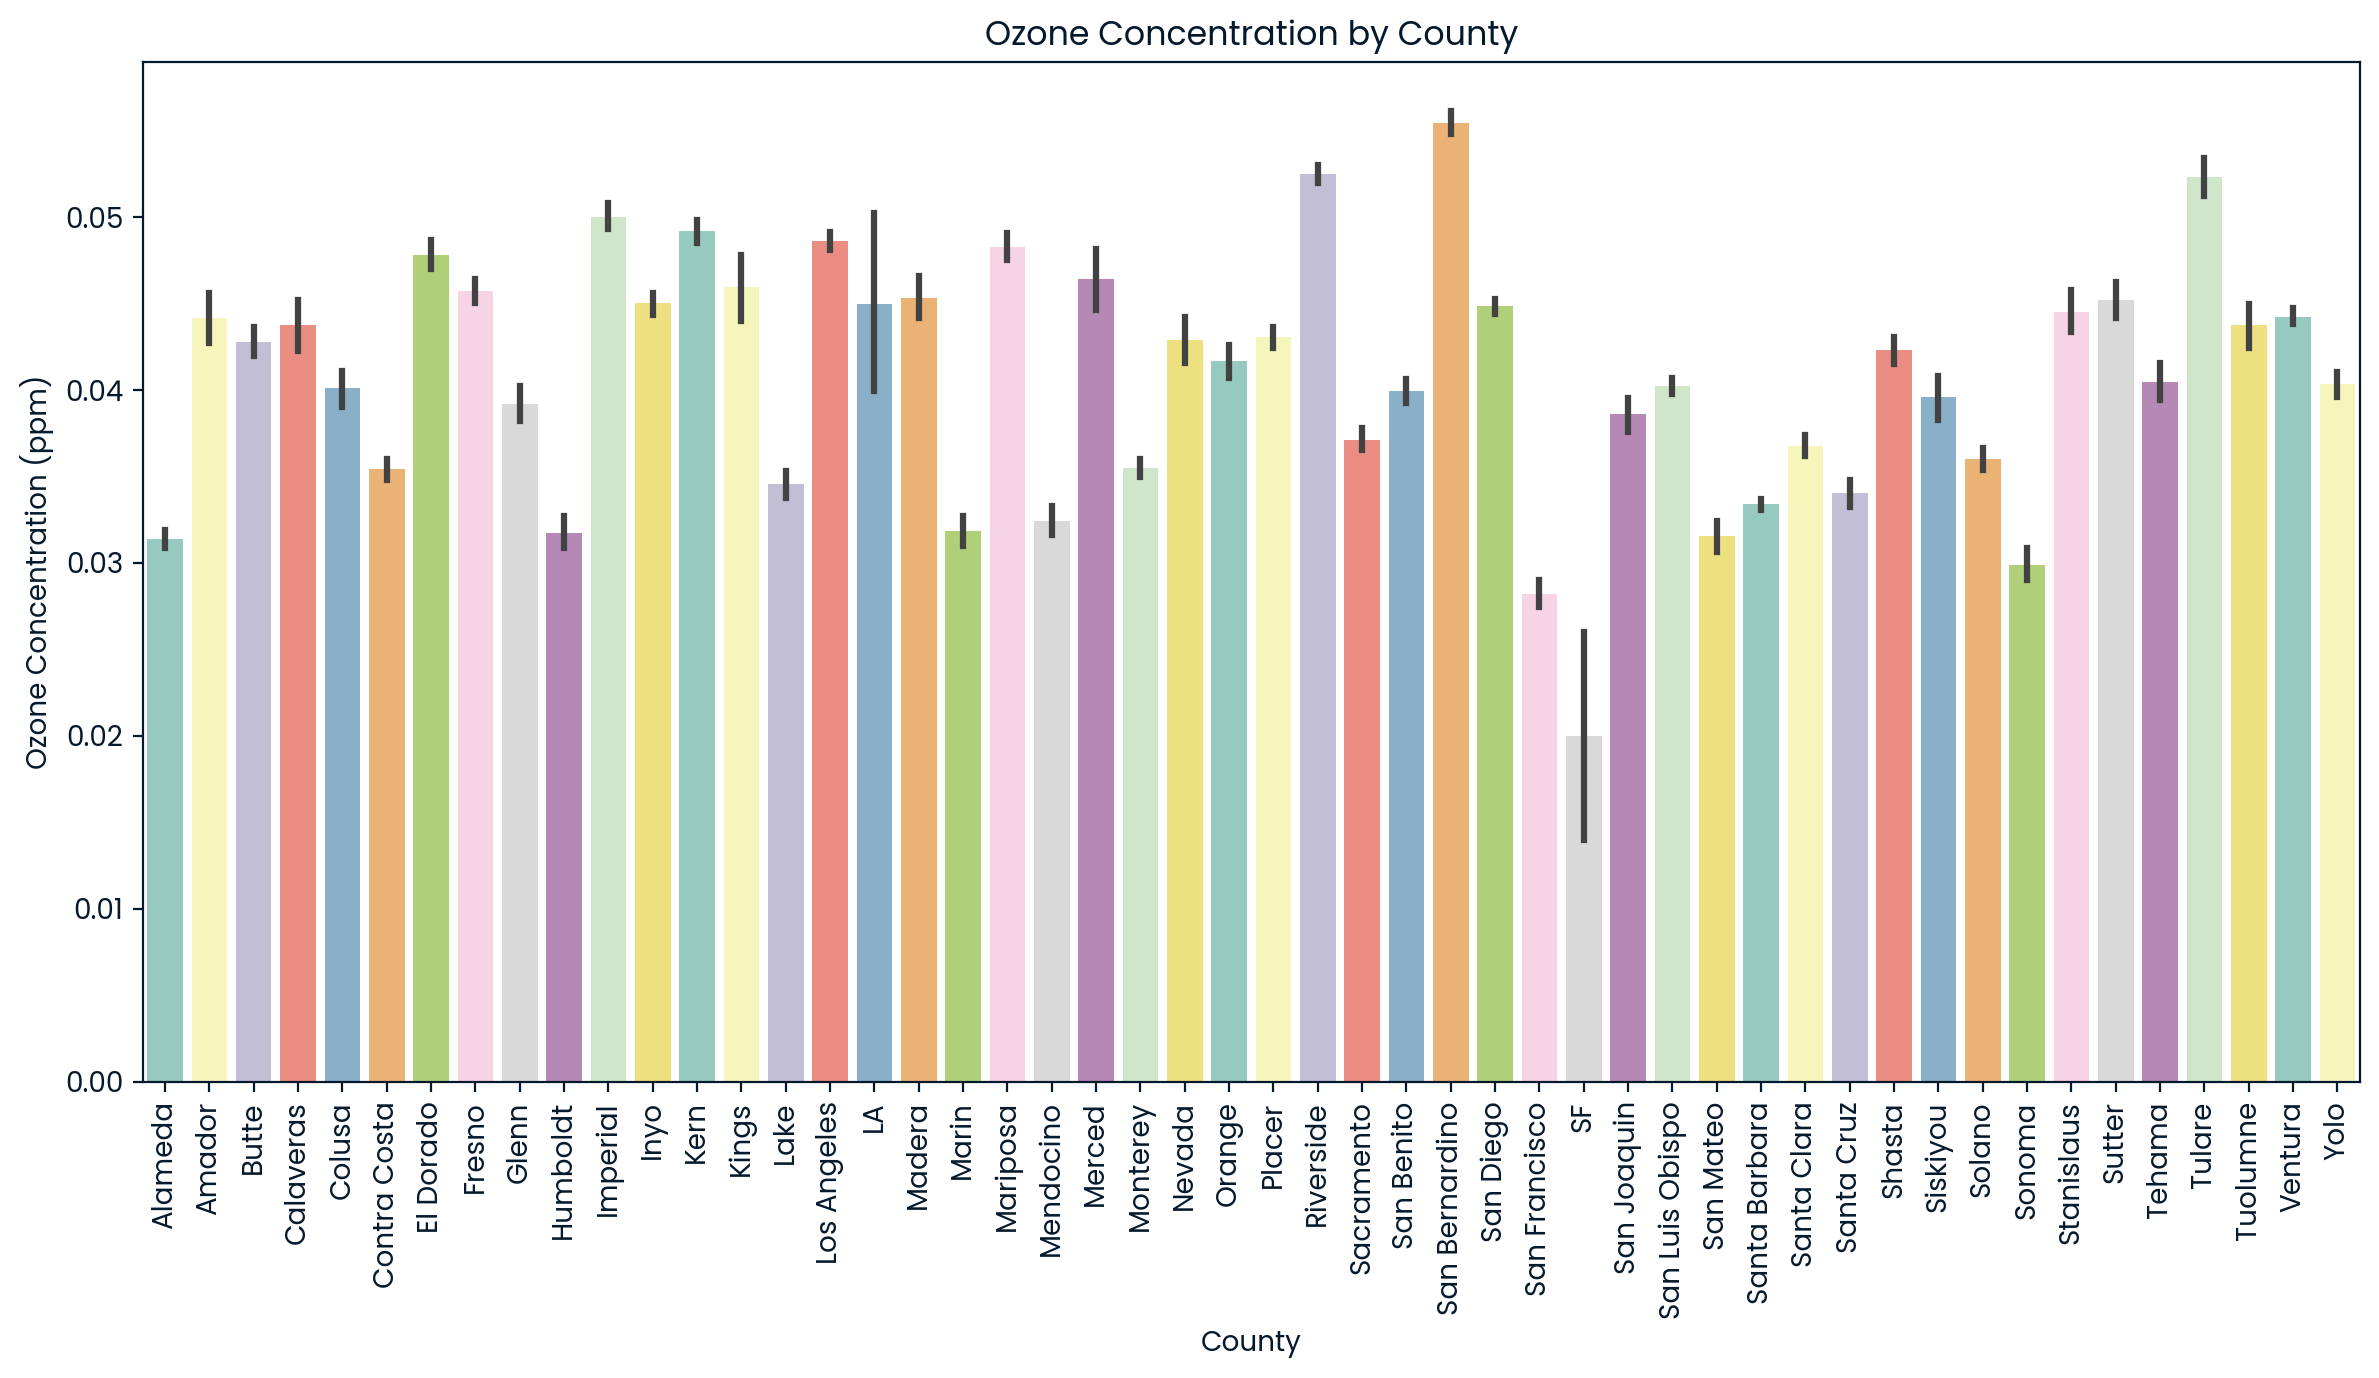

In [107]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=ozone,
    x='County',
    y='Daily Max 8-hour Ozone Concentration',
    palette='Set3'
)
plt.title("Ozone Concentration by County")
plt.xlabel("County")
plt.ylabel("Ozone Concentration (ppm)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Urban Activity Impact: Weekdays vs Weekends

The Weekday vs Weekend ozone levels was compared to assertain the impact of human activities on ozone levels 

Surprisingly, some urban stations like San Diego and Los Angeles showed slightly higher ozone levels on weekends, likely due to reduced Nitric Oxide (NO) emissions that normally suppress ozone formation via chemical scavenging or even due to recreational or tourist activities in these areas.

This pattern aligns with the "weekend ozone effect" observed in major cities globally.

In [108]:
# Select top 6 most frequently observed counties
top_counties = ozone['County'].value_counts().head(6).index
ozone_filtered = ozone[ozone['County'].isin(top_counties)]


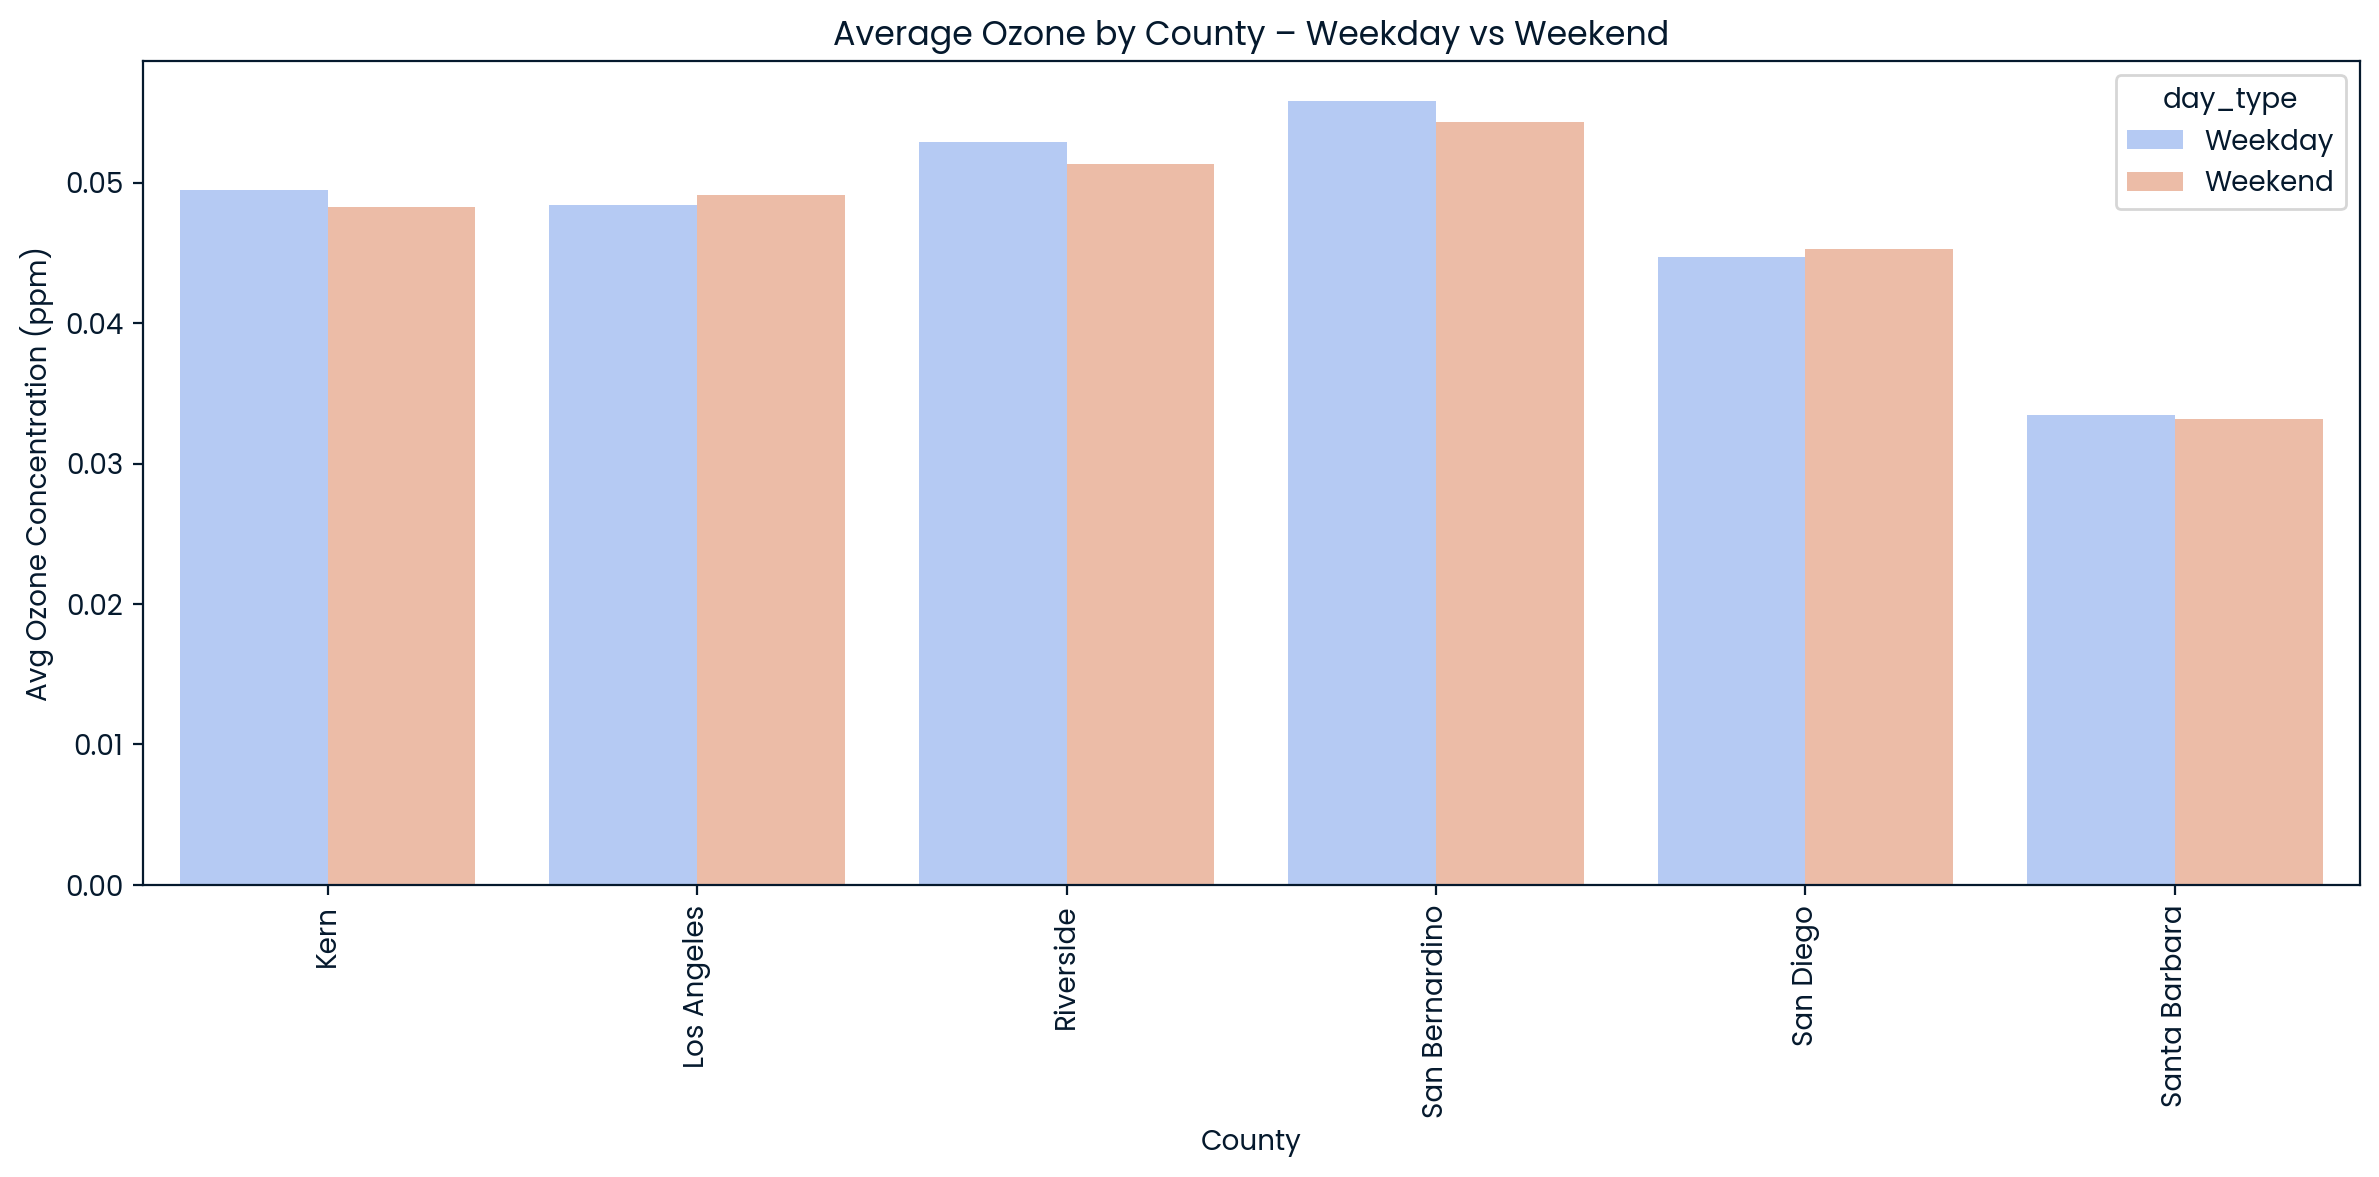

In [109]:
grouped = ozone_filtered.groupby(['County', 'day_type'])['Daily Max 8-hour Ozone Concentration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='County',
    y='Daily Max 8-hour Ozone Concentration',
    hue='day_type',
    palette='coolwarm'
)

plt.title("Average Ozone by County – Weekday vs Weekend")
plt.ylabel("Avg Ozone Concentration (ppm)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [110]:
# Select top 6 most frequently observed counties
top_CBSA_Name = ozone['CBSA Name'].value_counts().head(6).index
ozone_filtered = ozone[ozone['CBSA Name'].isin(top_CBSA_Name)]


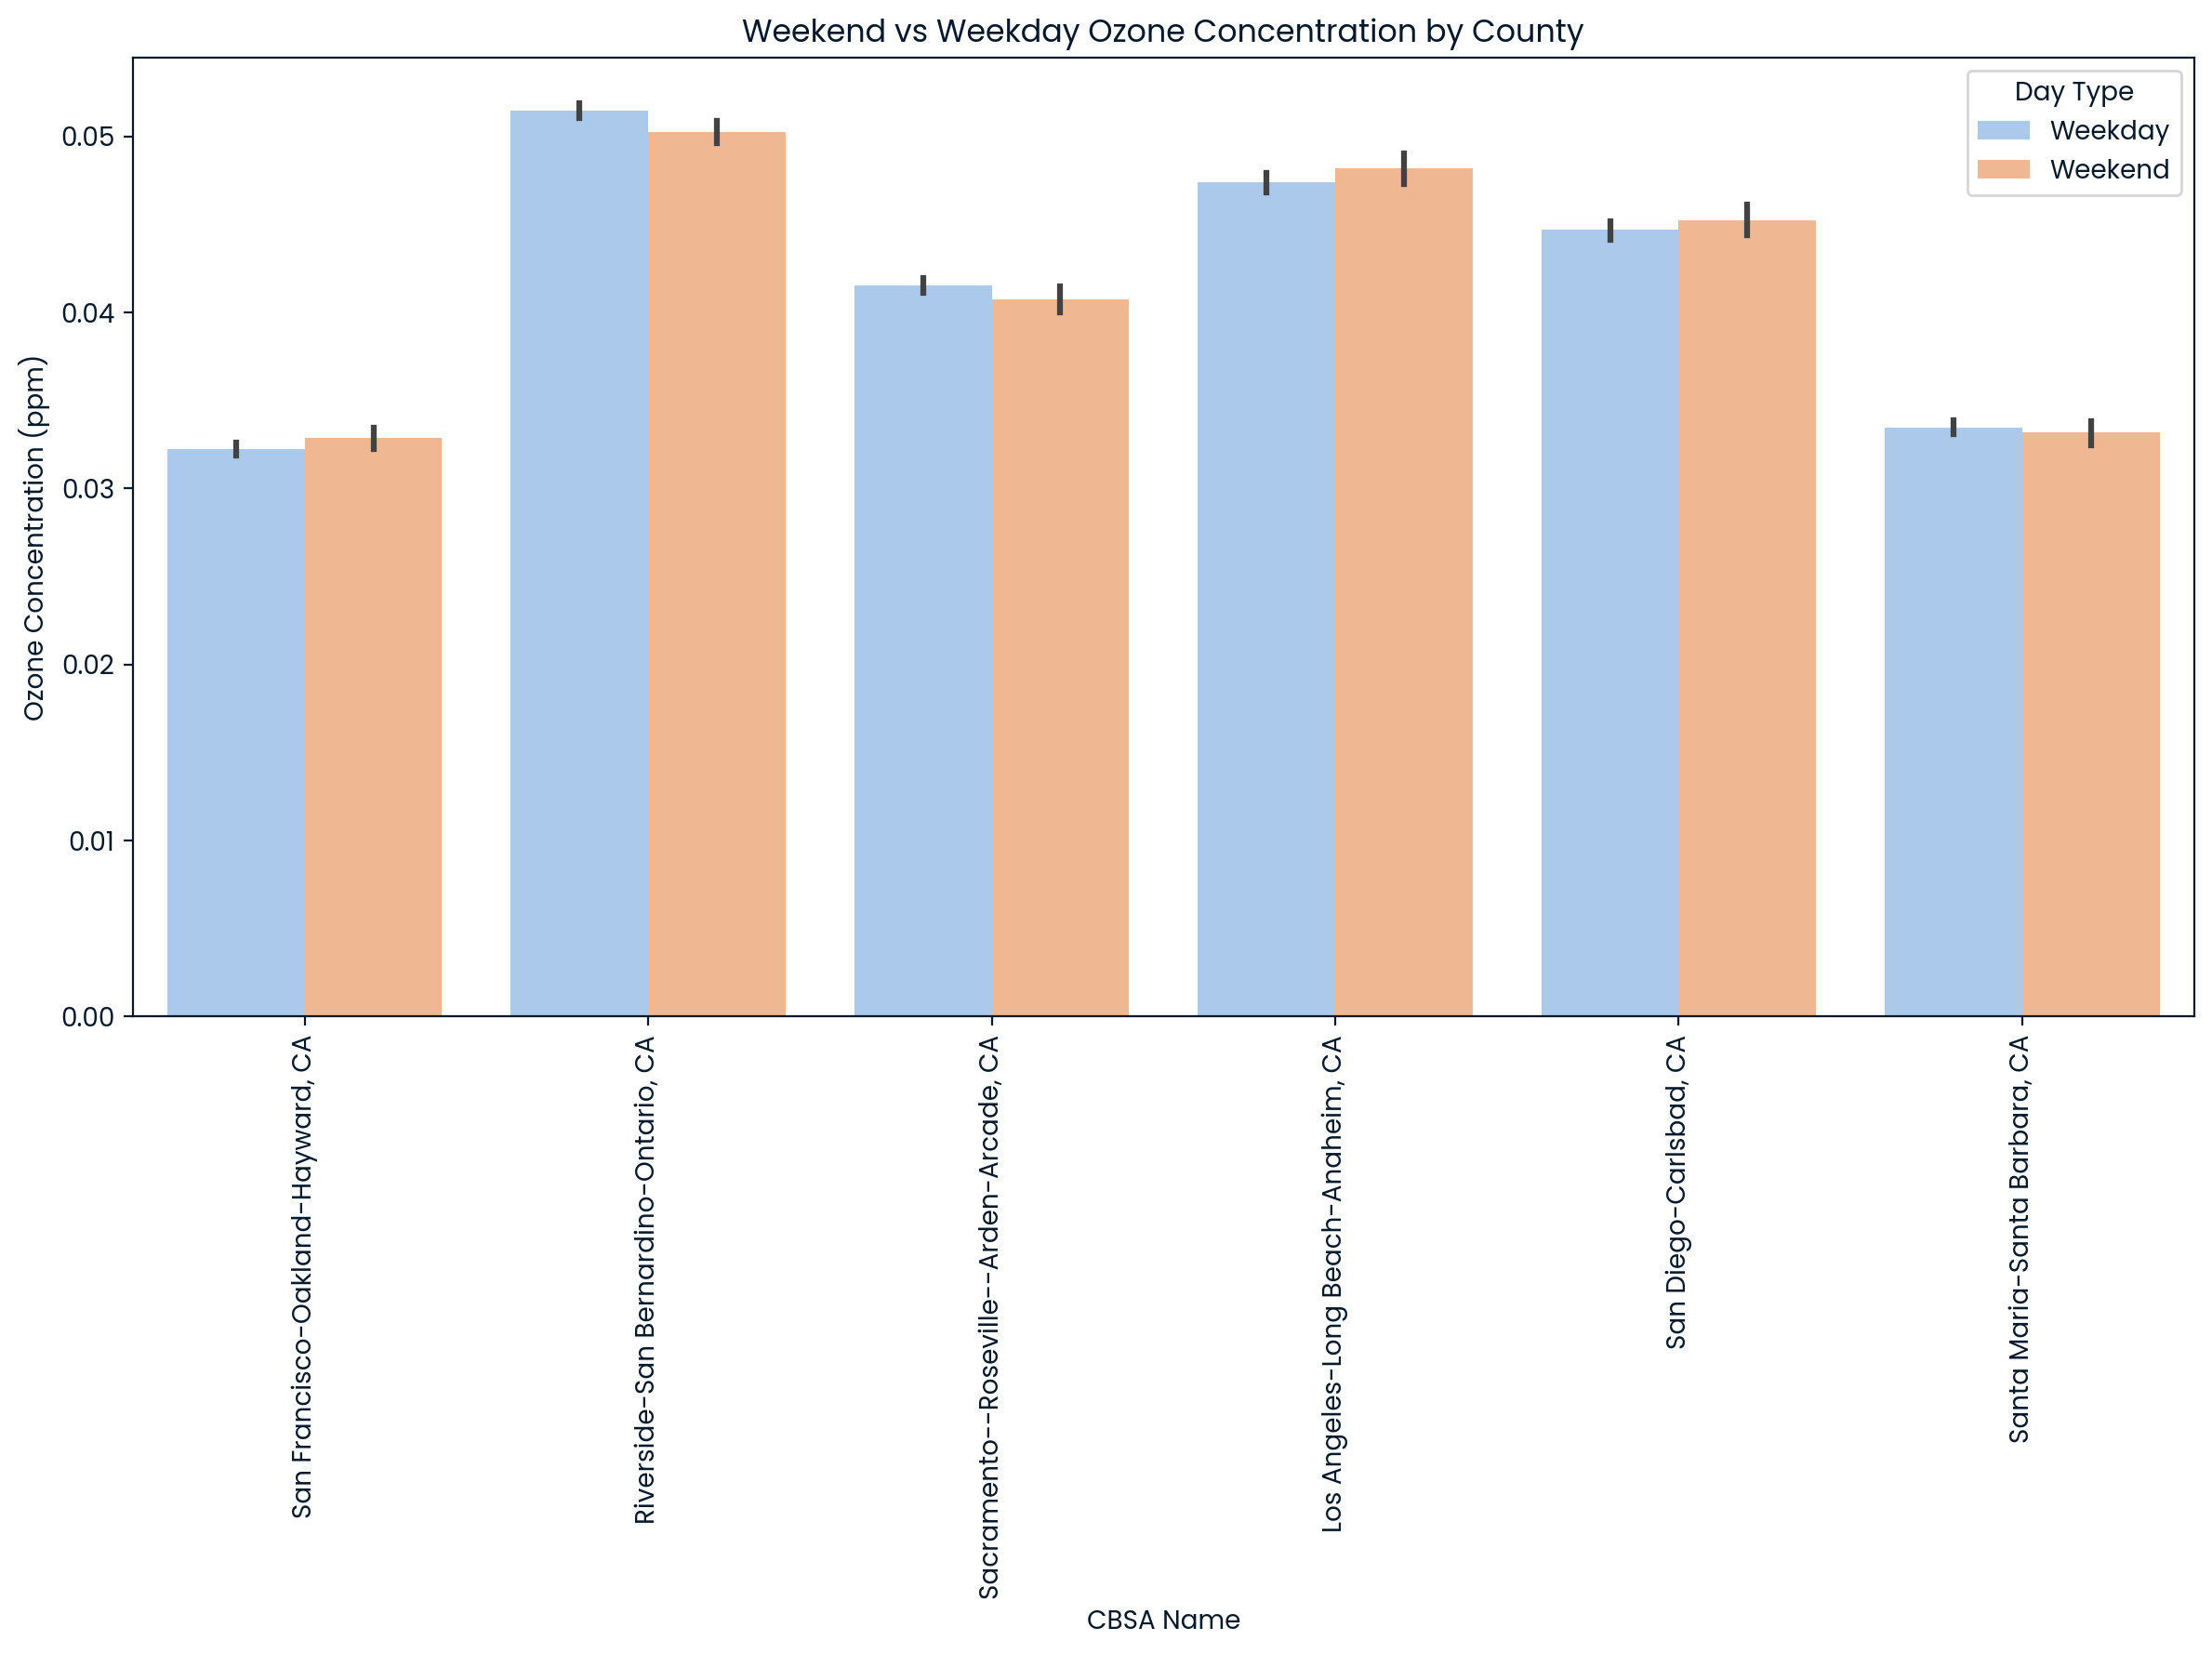

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.barplot(
    data=ozone_filtered,
    x='CBSA Name',
    y='Daily Max 8-hour Ozone Concentration',
    hue='day_type',
    palette='pastel'
)

plt.title('Weekend vs Weekday Ozone Concentration by County')
plt.xlabel('CBSA Name')
plt.ylabel('Ozone Concentration (ppm)')
plt.xticks(rotation=90)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


## Geospatial Heatmap of Ozone concentration

To visualize spatial distribution, a Folium-based interactive map was created with:

🔵 Blue markers for normal ozone levels

🟠 Orange for top 5 highest sites

🟣 Purple for the single highest ozone site

A heatmap overlay was used to show the concentration of hotspots

Using EPA's threshold (0.079 ppm for 8-hour max), No sites exceeded the threshold on average, but several individual daily readings were high.


In [112]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load and parse data
ozone = pd.read_csv('data/ozone.csv', parse_dates=['Date'])

# Compute average ozone & AQI per site
site_avg = ozone.groupby(
    ['Site Latitude', 'Site Longitude', 'Local Site Name', 'County']
)[['Daily Max 8-hour Ozone Concentration', 'Daily AQI Value']].mean().reset_index()

# Define outliers
HIGH_THRESHOLD = 0.079  # EPA ozone threshold (ppm)
site_avg['is_outlier'] = site_avg['Daily Max 8-hour Ozone Concentration'] > HIGH_THRESHOLD

# Create base map
m = folium.Map(location=[36.5, -119], zoom_start=6, tiles='CartoDB positron')

# --- Add Feature Groups ---
all_sites = folium.FeatureGroup(name='All Monitoring Sites').add_to(m)
outliers = folium.FeatureGroup(name='High Ozone Sites (> 0.079 ppm)').add_to(m)
heatmap_layer = folium.FeatureGroup(name='Ozone Intensity Heatmap').add_to(m)

# --- Add Circle Markers with Popups ---
for _, row in site_avg.iterrows():
    lat = row['Site Latitude']
    lon = row['Site Longitude']
    site = row['Local Site Name']
    county = row['County']
    ozone_level = row['Daily Max 8-hour Ozone Concentration']
    aqi = row['Daily AQI Value']
    outlier = row['is_outlier']
    
    popup_html = f"""
    <b>Site:</b> {site}<br>
    <b>County:</b> {county}<br>
    <b>Avg Ozone:</b> {ozone_level:.3f} ppm<br>
    <b>Avg AQI:</b> {aqi:.0f}
    """
    popup = folium.Popup(popup_html, max_width=250)

    color = 'red' if outlier else 'blue'

    marker = folium.CircleMarker(
        location=[lat, lon],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup
    )

    # Add marker to appropriate layer
    if outlier:
        marker.add_to(outliers)
    marker.add_to(all_sites)

# --- Add HeatMap Layer ---
heat_data = [
    [row['Site Latitude'], row['Site Longitude'], row['Daily Max 8-hour Ozone Concentration']]
    for _, row in site_avg.iterrows()
]

HeatMap(
    data=heat_data,
    radius=15,
    blur=20,
    max_zoom=13
).add_to(heatmap_layer)

# --- Add Layer Control ---
folium.LayerControl(collapsed=False).add_to(m)

# --- Show or Save Map ---
m  # Show in notebook
# m.save("enhanced_ozone_map_with_layers.html")  # optional, you can uncomment to export


In [113]:
# Check how many sites have avg ozone > 0.079 ppm
high_ozone_sites = site_avg[site_avg['Daily Max 8-hour Ozone Concentration'] > 0.079]
print(f"Number of high ozone sites: {len(high_ozone_sites)}")
display(high_ozone_sites[['Local Site Name', 'County', 'Daily Max 8-hour Ozone Concentration']])


Number of high ozone sites: 0


,Local Site Name,County,Daily Max 8-hour Ozone Concentration


## RECOMMENDATIONS

1) Targeted Emission Controls in Hotspot Regions

   Interventions in cities like Fresno, Tulare, San Bernardino, and other high-ozone inland cities should be prioritized. This can be done by:

- Expanding public transit networks.

- Incentivizing zero-emission farming equipment.

- Strict enforcement on industrial Volatile Organic Compounds (VOCs),

2) Promote Weekend-like Traffic Conditions on Weekdays

    Weekday–weekend gap shows that most urban ozones are traffic-sensitive which inturn leads to higher ozone concentrations. This effect can sorted out by:

- Encouraging remote work & staggered commuting.

- Expanding electric vehicle incentives.

3) Integrate Meteorological Data for Better Forecasting

    The Ozone spikes align with heatwaves and stagnant air. This is seen in Temporal patterns and regional charts which suggests climate-amplified pollution risk. This can be addressed by:

- Combining EPA data with temperature, wind, and humidity datasets.

- Building predictive models to issue public health alerts during vulnerable days.

4) Increase Monitoring in Under-represented Zones.

    Some coastal or rural areas show high variance, likely due to under-sampling. This can be seen in Spatial variance and low-station density limits analysis in remote counties. This can be sorted out by:

- Increasing monitoring coverage in underrepresented counties.

- Deploying mobile sensors or satellite-aided monitors.

- Partner with universities for micro-monitoring studies.

5) Encourage Public Awareness & Alerts

    Ozone alerts should be issued to vulnerable groups during high pollution days. This can be done by:

- Informing communities during high-risk periods (e.g., summer) to reduce outdoor activities and emissions.

-  Continuous support from Local governments on emissions control policies in ozone-prone regions.

